#Importing libraries and scaps dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from IPython.display import display, Math
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
warnings.filterwarnings("ignore")
df = pd.read_csv('S1.csv', skiprows=1, encoding='utf-8')
pd.set_option('display.max_columns', None)
df.head(2)

,material,Br,Eg,t,Nt,Nd,PCE,Voc,Jsc,FF
0,Cs0.17FA0.83PbI3,0.0,1.55,0.3,1.000000e+12,1.000000e+14,21.7,1.29,20.1,83.6
1,Cs0.17FA0.83PbI3,0.0,1.55,0.3,1.000000e+12,1.000000e+15,21.8,1.29,20.1,83.8


#Heatmap

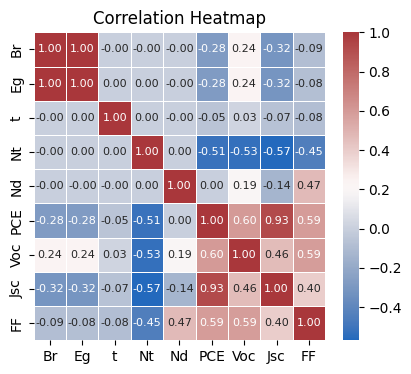

In [ ]:
df1=df.iloc[:,1:]
corr_matrix = df1.corr()

# Step 4: Draw the heatmap
plt.figure(figsize=(4.7, 4))  # Optional: Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=0.5,  annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.savefig('Correlation.png', dpi=300, bbox_inches='tight')
plt.show()

#Data Prep

In [ ]:
dfx=df.iloc[:,1:-4]
X=dfx.values
y_eta=df.iloc[:,-4].values
y_voc=df.iloc[:,-3].values
y_jsc=df.iloc[:,-2].values
y_ff=df.iloc[:,-1].values
y_eta=y_eta.reshape(len(y_eta),1)
y_voc=y_voc.reshape(len(y_voc),1)
y_jsc=y_jsc.reshape(len(y_jsc),1)
y_ff=y_ff.reshape(len(y_ff),1)
dfx

,Br,Eg,t,Nt,Nd
0,0.0,1.55,0.3,1.000000e+12,1.000000e+14
1,0.0,1.55,0.3,1.000000e+12,1.000000e+15
2,0.0,1.55,0.3,1.000000e+12,1.000000e+16
3,0.0,1.55,0.3,1.000000e+12,1.000000e+17
4,0.0,1.55,0.3,1.000000e+12,1.000000e+18
...,...,...,...,...,...
3235,2.5,2.07,1.0,1.000000e+17,1.000000e+15
3236,2.5,2.07,1.0,1.000000e+17,1.000000e+16
3237,2.5,2.07,1.0,1.000000e+17,1.000000e+17
3238,2.5,2.07,1.0,1.000000e+17,1.000000e+18


#Supervised Learning

##Random Forest Algorithm Training

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Efficiency Model
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_eta, test_size=0.2, random_state=100)
rf_eta = RandomForestRegressor(random_state=100)
rf_eta.fit(X_train1, y_train1)
mse_scores1 = cross_val_score(estimator=rf_eta, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores1 = np.sqrt(-mse_scores1)

# Print results
print("RMSE_eta: {:.4f}".format(rmse_scores1.mean()))
print("Standard_Deviation_eta: {:.4f}".format(rmse_scores1.std()))


RMSE_eta: 0.2534
Standard_Deviation_eta: 0.0348


In [ ]:
#Voc Model
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_voc, test_size=0.2,  random_state=100)
rf_voc = RandomForestRegressor(random_state=100)
rf_voc.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores2 = cross_val_score(estimator=rf_voc, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores2 = np.sqrt(-mse_scores2)
print("RMSE_voc: {:.4f}".format(rmse_scores2.mean()))
print("Standard_Deviation_voc: {:.4f}".format(rmse_scores2.std()))

RMSE_voc: 0.0094
Standard_Deviation_voc: 0.0009


In [ ]:
#Jsc Model
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y_jsc, test_size=0.2,  random_state=100)
rf_jsc = RandomForestRegressor(random_state=100)
rf_jsc.fit(X_train3, y_train3)

# Calculate cross-validated RMSE
mse_scores3 = cross_val_score(estimator=rf_jsc, X=X_train3, y=y_train3, cv=5, scoring='neg_mean_squared_error')
rmse_scores3 = np.sqrt(-mse_scores3)
print("RMSE_jsc: {:.4f}".format(rmse_scores3.mean()))
print("Standard_Deviation_jsc: {:.4f}".format(rmse_scores3.std()))

RMSE_jsc: 0.3777
Standard_Deviation_jsc: 0.0119


In [ ]:
#FF Model
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y_ff, test_size=0.2,  random_state=100)
rf_ff = RandomForestRegressor(random_state=100)
rf_ff.fit(X_train4, y_train4)

# Calculate cross-validated RMSE
mse_scores4 = cross_val_score(estimator=rf_ff, X=X_train4, y=y_train4, cv=5, scoring='neg_mean_squared_error')
rmse_scores4 = np.sqrt(-mse_scores4)
print("RMSE_ff: {:.4f}".format(rmse_scores4.mean()))
print("Standard_Deviation_ff: {:.4f}".format(rmse_scores4.std()))

RMSE_ff: 1.4359
Standard_Deviation_ff: 0.2067


##Prediction on Test set

In [ ]:
# Predict on the test set
y_pred1 = rf_eta.predict(X_test1)
y_pred1 = y_pred1.reshape(len(y_pred1), 1)

# Calculate correlation coefficient (R value)
r_value1 = np.corrcoef(y_test1.squeeze(), y_pred1.squeeze())[0, 1]

# Calculate evaluation metrics
print("R² on Test Set:", r2_score(y_test1, y_pred1))
print("R value:", r_value1)
print("MAE on Test Set:", mean_absolute_error(y_test1, y_pred1))
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred1)))

R² on Test Set: 0.9993698604196765
R value: 0.9996896533066483
MAE on Test Set: 0.11653037345679045
MSE on Test Set: 0.03893664182306213
RMSE on Test Set: 0.19732369807770717


In [ ]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

[[14.34 14.4 ]
 [13.17 12.9 ]
 [25.01 25.2 ]
 ...
 [ 5.03  4.97]
 [ 1.61  1.79]
 [ 0.06  0.06]]


In [ ]:
#Voc on test set
y_pred2=rf_voc.predict(X_test2)
y_pred2=y_pred2.reshape(len(y_pred2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test2, y_pred2))
print("R value:", r_value2)
print("MAE on Test Set:", mean_absolute_error(y_test2, y_pred2))
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred2)))

R2 on Test Set: 0.9975222165955607
R value: 0.9988157657402331
MAE on Test Set: 0.004674058641975508
MSE on Test Set: 6.750866867283895e-05
RMSE on Test Set: 0.008216365904269293


In [ ]:
np.set_printoptions(precision=2,suppress=True)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[1.11 1.11]
 [1.27 1.27]
 [1.29 1.29]
 ...
 [1.11 1.1 ]
 [1.01 1.01]
 [0.73 0.7 ]]


In [ ]:
#Jsc on Test set
y_pred3=rf_jsc.predict(X_test3)
y_pred3=y_pred3.reshape(len(y_pred3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test3, y_pred3))
print("R value:", r_value3)
print("MAE on Test Set:", mean_absolute_error(y_test3, y_pred3))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred3)))

R2 on Test Set: 0.9983182722230259
R value: 0.9991633797129291
MAE on Test Set: 0.17517642901234592
RMSE on Test Set: 0.31710279068091823


In [ ]:
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test3.reshape(len(y_test3),1)),1))

[[19.6  19.9 ]
 [12.86 12.6 ]
 [22.65 22.6 ]
 ...
 [10.35 10.3 ]
 [ 3.56  3.68]
 [ 0.31  0.29]]


In [ ]:
#ff on Test set
y_pred4 = rf_ff.predict(X_test4)
y_pred4 = y_pred4.reshape(len(y_pred4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred4)))

R2 on Test Set: 0.9976252795353108
R value: 0.9988203053962224
MAE on Test Set: 0.6383601851851815
MSE on Test Set: 1.3965007341975304
RMSE on Test Set: 1.1817363217729793


In [ ]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test4.reshape(len(y_test4),1)),1))

[[66.13 65.6 ]
 [80.72 80.8 ]
 [86.23 86.3 ]
 ...
 [41.78 43.5 ]
 [48.   48.1 ]
 [28.57 29.2 ]]


#Verification with few Experimental data

##Cs0.17FA0.83PbI3 DOI: 10.1002/adfm.201806479

In [ ]:
import numpy as np

material = "Cs0.17FA0.83PbI2.6Br0.4"
bandgap = 1.56 #1.63064 #1.56
defect = 1e14
donor_density = 1e16
Br = 0
thickness = 0.5 # Single thickness value

# Create the NumPy array with a single row
arr = np.array([
    [material, Br, bandgap, thickness, defect, donor_density]
], dtype=object)  # Use object dtype to handle mixed types

# Display the array
print(arr)

[['Cs0.17FA0.83PbI2.6Br0.4' 0 1.56 0.5 100000000000000.0 1e+16]]


In [ ]:
arr_numeric = arr[:, 1:].astype(float)  # Convert values to float for ML model

# Predict the parameters
eff_arr = rf_eta.predict(arr_numeric)
voc_arr = rf_voc.predict(arr_numeric)
jsc_arr = rf_jsc.predict(arr_numeric)
ff_arr = rf_ff.predict(arr_numeric)

# Display the results
print("Efficiency:", eff_arr)
print("Voc:", voc_arr)
print("Jsc:", jsc_arr)
print("Fill Factor:", ff_arr)

Efficiency: [17.84]
Voc: [1.12]
Jsc: [22.02]
Fill Factor: [72.01]


##Cs0.17FA0.83PbI2.6Br0.4 DOI: 10.1002/smll.201803350

In [ ]:
material = "Cs0.17FA0.83PbI2.6Br0.4"
bandgap = 1.63
defect = 1e14
donor_density = 1e16
Br = 0.4
thickness = 0.5 # Single thickness value

# Create the NumPy array with a single row
arr = np.array([
    [material, Br, bandgap, thickness, defect, donor_density]
], dtype=object)  # Use object dtype to handle mixed types

# Display the array
print(arr)

[['Cs0.17FA0.83PbI2.6Br0.4' 0.4 1.63 0.5 100000000000000.0 1e+16]]


In [ ]:
arr_numeric = arr[:, 1:].astype(float)  # Convert values to float for ML model

# Predict the parameters
eff_arr = rf_eta.predict(arr_numeric)
voc_arr = rf_voc.predict(arr_numeric)
jsc_arr = rf_jsc.predict(arr_numeric)
ff_arr = rf_ff.predict(arr_numeric)

# Display the results
print("Efficiency:", eff_arr)
print("Voc:", voc_arr)
print("Jsc:", jsc_arr)
print("Fill Factor:", ff_arr)

Efficiency: [14.15]
Voc: [1.14]
Jsc: [19.22]
Fill Factor: [63.72]


#KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score

# Efficiency Model using KNN
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y_eta, test_size=0.2, random_state=100)
knn_eta = KNeighborsRegressor(n_neighbors=5)
knn_eta.fit(X_train_knn, y_train_knn)
mse_scores_knn = cross_val_score(estimator=knn_eta, X=X_train_knn, y=y_train_knn, cv=5, scoring='neg_mean_squared_error')
rmse_scores_knn = np.sqrt(-mse_scores_knn)

# Print results
print("RMSE_eta_KNN: {:.4f}".format(rmse_scores_knn.mean()))
print("Standard_Deviation_eta_KNN: {:.4f}".format(rmse_scores_knn.std()))


RMSE_eta_KNN: 0.9245
Standard_Deviation_eta_KNN: 0.0670


In [ ]:
# Voc Model using KNN
X_train_knn_voc, X_test_knn_voc, y_train_knn_voc, y_test_knn_voc = train_test_split(X, y_voc, test_size=0.2, random_state=100)
knn_voc = KNeighborsRegressor(n_neighbors=5)
knn_voc.fit(X_train_knn_voc, y_train_knn_voc)

# Calculate cross-validated RMSE
mse_scores_knn_voc = cross_val_score(estimator=knn_voc, X=X_train_knn_voc, y=y_train_knn_voc, cv=5, scoring='neg_mean_squared_error')
rmse_scores_knn_voc = np.sqrt(-mse_scores_knn_voc)

# Print results
print("RMSE_voc_KNN: {:.4f}".format(rmse_scores_knn_voc.mean()))
print("Standard_Deviation_voc_KNN: {:.4f}".format(rmse_scores_knn_voc.std()))

RMSE_voc_KNN: 0.0532
Standard_Deviation_voc_KNN: 0.0041


In [ ]:
# Jsc Model using KNN
X_train_knn_jsc, X_test_knn_jsc, y_train_knn_jsc, y_test_knn_jsc = train_test_split(X, y_jsc, test_size=0.2, random_state=100)
knn_jsc = KNeighborsRegressor(n_neighbors=5)
knn_jsc.fit(X_train_knn_jsc, y_train_knn_jsc)

# Calculate cross-validated RMSE
mse_scores_knn_jsc = cross_val_score(estimator=knn_jsc, X=X_train_knn_jsc, y=y_train_knn_jsc, cv=5, scoring='neg_mean_squared_error')
rmse_scores_knn_jsc = np.sqrt(-mse_scores_knn_jsc)

# Print results
print("RMSE_jsc_KNN: {:.4f}".format(rmse_scores_knn_jsc.mean()))
print("Standard_Deviation_jsc_KNN: {:.4f}".format(rmse_scores_knn_jsc.std()))


RMSE_jsc_KNN: 1.1260
Standard_Deviation_jsc_KNN: 0.1017


In [ ]:
# FF Model using KNN
X_train_knn_ff, X_test_knn_ff, y_train_knn_ff, y_test_knn_ff = train_test_split(X, y_ff, test_size=0.2, random_state=100)
knn_ff = KNeighborsRegressor(n_neighbors=5)
knn_ff.fit(X_train_knn_ff, y_train_knn_ff)

# Calculate cross-validated RMSE
mse_scores_knn_ff = cross_val_score(estimator=knn_ff, X=X_train_knn_ff, y=y_train_knn_ff, cv=5, scoring='neg_mean_squared_error')
rmse_scores_knn_ff = np.sqrt(-mse_scores_knn_ff)

# Print results
print("RMSE_ff_KNN: {:.4f}".format(rmse_scores_knn_ff.mean()))
print("Standard_Deviation_ff_KNN: {:.4f}".format(rmse_scores_knn_ff.std()))


RMSE_ff_KNN: 2.7737
Standard_Deviation_ff_KNN: 0.3186


##KNN on test set

In [ ]:
# Predict on the test set using KNN for Efficiency Model
y_pred_knn_eta = knn_eta.predict(X_test_knn)
y_pred_knn_eta = y_pred_knn_eta.reshape(len(y_pred_knn_eta), 1)

# Calculate correlation coefficient (R value)
r_value_knn_eta = np.corrcoef(y_test_knn.squeeze(), y_pred_knn_eta.squeeze())[0, 1]

# Calculate evaluation metrics
print("R² on Test Set (KNN_eta):", r2_score(y_test_knn, y_pred_knn_eta))
print("R value (KNN_eta):", r_value_knn_eta)
print("MAE on Test Set (KNN_eta):", mean_absolute_error(y_test_knn, y_pred_knn_eta))
print("MSE on Test Set (KNN_eta):", mean_squared_error(y_test_knn, y_pred_knn_eta))
print("RMSE on Test Set (KNN_eta):", np.sqrt(mean_squared_error(y_test_knn, y_pred_knn_eta)))

R² on Test Set (KNN_eta): 0.9901577215206784
R value (KNN_eta): 0.9951098029873472
MAE on Test Set (KNN_eta): 0.43361194444444445
MSE on Test Set (KNN_eta): 0.6081593409438272
RMSE on Test Set (KNN_eta): 0.7798457161155834


In [ ]:
# Predict on the test set using KNN for Voc Model
y_pred_knn_voc = knn_voc.predict(X_test_knn_voc)
y_pred_knn_voc = y_pred_knn_voc.reshape(len(y_pred_knn_voc), 1)

# Calculate correlation coefficient (R value)
r_value_knn_voc = np.corrcoef(y_test_knn_voc.squeeze(), y_pred_knn_voc.squeeze())[0, 1]

# Calculate evaluation metrics
print("R² on Test Set (KNN_voc):", r2_score(y_test_knn_voc, y_pred_knn_voc))
print("R value (KNN_voc):", r_value_knn_voc)
print("MAE on Test Set (KNN_voc):", mean_absolute_error(y_test_knn_voc, y_pred_knn_voc))
print("MSE on Test Set (KNN_voc):", mean_squared_error(y_test_knn_voc, y_pred_knn_voc))
print("RMSE on Test Set (KNN_voc):", np.sqrt(mean_squared_error(y_test_knn_voc, y_pred_knn_voc)))


R² on Test Set (KNN_voc): 0.9367180340966581
R value (KNN_voc): 0.9687011130713536
MAE on Test Set (KNN_voc): 0.01727160493827161
MSE on Test Set (KNN_voc): 0.0017241544444444442
RMSE on Test Set (KNN_voc): 0.04152293877418173


In [ ]:
# Predict on the test set using KNN for Jsc Model
y_pred_knn_jsc = knn_jsc.predict(X_test_knn_jsc)
y_pred_knn_jsc = y_pred_knn_jsc.reshape(len(y_pred_knn_jsc), 1)

# Calculate correlation coefficient (R value)
r_value_knn_jsc = np.corrcoef(y_test_knn_jsc.squeeze(), y_pred_knn_jsc.squeeze())[0, 1]

# Calculate evaluation metrics
print("R² on Test Set (KNN_jsc):", r2_score(y_test_knn_jsc, y_pred_knn_jsc))
print("R value (KNN_jsc):", r_value_knn_jsc)
print("MAE on Test Set (KNN_jsc):", mean_absolute_error(y_test_knn_jsc, y_pred_knn_jsc))
print("RMSE on Test Set (KNN_jsc):", np.sqrt(mean_squared_error(y_test_knn_jsc, y_pred_knn_jsc)))


R² on Test Set (KNN_jsc): 0.986425725617272
R value (KNN_jsc): 0.9932678728927428
MAE on Test Set (KNN_jsc): 0.522102098765432
RMSE on Test Set (KNN_jsc): 0.900908173576688


In [ ]:
# Predict on the test set using KNN for FF Model
y_pred_knn_ff = knn_ff.predict(X_test_knn_ff)
y_pred_knn_ff = y_pred_knn_ff.reshape(len(y_pred_knn_ff), 1)

# Calculate correlation coefficient (R value)
r_value_knn_ff = np.corrcoef(y_test_knn_ff.squeeze(), y_pred_knn_ff.squeeze())[0, 1]

# Calculate evaluation metrics
print("R² on Test Set (KNN_ff):", r2_score(y_test_knn_ff, y_pred_knn_ff))
print("R value (KNN_ff):", r_value_knn_ff)
print("MAE on Test Set (KNN_ff):", mean_absolute_error(y_test_knn_ff, y_pred_knn_ff))
print("MSE on Test Set (KNN_ff):", mean_squared_error(y_test_knn_ff, y_pred_knn_ff))
print("RMSE on Test Set (KNN_ff):", np.sqrt(mean_squared_error(y_test_knn_ff, y_pred_knn_ff)))

R² on Test Set (KNN_ff): 0.9893689701304654
R value (KNN_ff): 0.9948107927812324
MAE on Test Set (KNN_ff): 1.2281543209876544
MSE on Test Set (KNN_ff): 6.251784679012344
RMSE on Test Set (KNN_ff): 2.500356910325473


#Gradient Boosting model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Efficiency Model using Gradient Boosting
X_train_gbr_eta, X_test_gbr_eta, y_train_gbr_eta, y_test_gbr_eta = train_test_split(X, y_eta, test_size=0.2, random_state=100)
gbr_eta = GradientBoostingRegressor(random_state=100)
gbr_eta.fit(X_train_gbr_eta, y_train_gbr_eta)

# Cross-validation RMSE
mse_scores_gbr_eta = cross_val_score(estimator=gbr_eta, X=X_train_gbr_eta, y=y_train_gbr_eta, cv=5, scoring='neg_mean_squared_error')
rmse_scores_gbr_eta = np.sqrt(-mse_scores_gbr_eta)

# Print cross-validation results
print("RMSE_eta_GBR: {:.4f}".format(rmse_scores_gbr_eta.mean()))
print("Standard_Deviation_eta_GBR: {:.4f}".format(rmse_scores_gbr_eta.std()))

# Predict on test set
y_pred_gbr_eta = gbr_eta.predict(X_test_gbr_eta).reshape(-1, 1)

# Compute evaluation metrics
r_value_gbr_eta = np.corrcoef(y_test_gbr_eta.squeeze(), y_pred_gbr_eta.squeeze())[0, 1]

print("R² on Test Set (GBR_eta):", r2_score(y_test_gbr_eta, y_pred_gbr_eta))
print("R value (GBR_eta):", r_value_gbr_eta)
print("MAE on Test Set (GBR_eta):", mean_absolute_error(y_test_gbr_eta, y_pred_gbr_eta))
print("MSE on Test Set (GBR_eta):", mean_squared_error(y_test_gbr_eta, y_pred_gbr_eta))
print("RMSE on Test Set (GBR_eta):", np.sqrt(mean_squared_error(y_test_gbr_eta, y_pred_gbr_eta)))


RMSE_eta_GBR: 0.7843
Standard_Deviation_eta_GBR: 0.0419
R² on Test Set (GBR_eta): 0.9886348787173767
R value (GBR_eta): 0.994311021584332
MAE on Test Set (GBR_eta): 0.575766330310366
MSE on Test Set (GBR_eta): 0.702256564220209
RMSE on Test Set (GBR_eta): 0.8380074965179064


In [ ]:
# Voc Model using Gradient Boosting
X_train_gbr_voc, X_test_gbr_voc, y_train_gbr_voc, y_test_gbr_voc = train_test_split(X, y_voc, test_size=0.2, random_state=100)
gbr_voc = GradientBoostingRegressor(random_state=100)
gbr_voc.fit(X_train_gbr_voc, y_train_gbr_voc)

# Cross-validation RMSE
mse_scores_gbr_voc = cross_val_score(estimator=gbr_voc, X=X_train_gbr_voc, y=y_train_gbr_voc, cv=5, scoring='neg_mean_squared_error')
rmse_scores_gbr_voc = np.sqrt(-mse_scores_gbr_voc)

# Print cross-validation results
print("RMSE_voc_GBR: {:.4f}".format(rmse_scores_gbr_voc.mean()))
print("Standard_Deviation_voc_GBR: {:.4f}".format(rmse_scores_gbr_voc.std()))

# Predict on test set
y_pred_gbr_voc = gbr_voc.predict(X_test_gbr_voc).reshape(-1, 1)

# Compute evaluation metrics
r_value_gbr_voc = np.corrcoef(y_test_gbr_voc.squeeze(), y_pred_gbr_voc.squeeze())[0, 1]

print("R² on Test Set (GBR_voc):", r2_score(y_test_gbr_voc, y_pred_gbr_voc))
print("R value (GBR_voc):", r_value_gbr_voc)
print("MAE on Test Set (GBR_voc):", mean_absolute_error(y_test_gbr_voc, y_pred_gbr_voc))
print("MSE on Test Set (GBR_voc):", mean_squared_error(y_test_gbr_voc, y_pred_gbr_voc))
print("RMSE on Test Set (GBR_voc):", np.sqrt(mean_squared_error(y_test_gbr_voc, y_pred_gbr_voc)))

RMSE_voc_GBR: 0.0302
Standard_Deviation_voc_GBR: 0.0018
R² on Test Set (GBR_voc): 0.9608821911157993
R value (GBR_voc): 0.982463871686448
MAE on Test Set (GBR_voc): 0.020619112705731597
MSE on Test Set (GBR_voc): 0.0010657877498249674
RMSE on Test Set (GBR_voc): 0.032646404852984465


In [ ]:
# Jsc Model using Gradient Boosting
X_train_gbr_jsc, X_test_gbr_jsc, y_train_gbr_jsc, y_test_gbr_jsc = train_test_split(X, y_jsc, test_size=0.2, random_state=100)
gbr_jsc = GradientBoostingRegressor(random_state=100)
gbr_jsc.fit(X_train_gbr_jsc, y_train_gbr_jsc)

# Cross-validation RMSE
mse_scores_gbr_jsc = cross_val_score(estimator=gbr_jsc, X=X_train_gbr_jsc, y=y_train_gbr_jsc, cv=5, scoring='neg_mean_squared_error')
rmse_scores_gbr_jsc = np.sqrt(-mse_scores_gbr_jsc)

# Print cross-validation results
print("RMSE_jsc_GBR: {:.4f}".format(rmse_scores_gbr_jsc.mean()))
print("Standard_Deviation_jsc_GBR: {:.4f}".format(rmse_scores_gbr_jsc.std()))

# Predict on test set
y_pred_gbr_jsc = gbr_jsc.predict(X_test_gbr_jsc).reshape(-1, 1)

# Compute evaluation metrics
r_value_gbr_jsc = np.corrcoef(y_test_gbr_jsc.squeeze(), y_pred_gbr_jsc.squeeze())[0, 1]

print("R² on Test Set (GBR_jsc):", r2_score(y_test_gbr_jsc, y_pred_gbr_jsc))
print("R value (GBR_jsc):", r_value_gbr_jsc)
print("MAE on Test Set (GBR_jsc):", mean_absolute_error(y_test_gbr_jsc, y_pred_gbr_jsc))
print("MSE on Test Set (GBR_jsc):", mean_squared_error(y_test_gbr_jsc, y_pred_gbr_jsc))
print("RMSE on Test Set (GBR_jsc):", np.sqrt(mean_squared_error(y_test_gbr_jsc, y_pred_gbr_jsc)))


RMSE_jsc_GBR: 1.2796
Standard_Deviation_jsc_GBR: 0.0462
R² on Test Set (GBR_jsc): 0.9730160975828372
R value (GBR_jsc): 0.9864994609298909
MAE on Test Set (GBR_jsc): 0.8955875099106628
MSE on Test Set (GBR_jsc): 1.6134265093712712
RMSE on Test Set (GBR_jsc): 1.270207270240283


In [ ]:
# FF Model using Gradient Boosting
X_train_gbr_ff, X_test_gbr_ff, y_train_gbr_ff, y_test_gbr_ff = train_test_split(X, y_ff, test_size=0.2, random_state=100)
gbr_ff = GradientBoostingRegressor(random_state=100)
gbr_ff.fit(X_train_gbr_ff, y_train_gbr_ff)

# Cross-validation RMSE
mse_scores_gbr_ff = cross_val_score(estimator=gbr_ff, X=X_train_gbr_ff, y=y_train_gbr_ff, cv=5, scoring='neg_mean_squared_error')
rmse_scores_gbr_ff = np.sqrt(-mse_scores_gbr_ff)

# Print cross-validation results
print("RMSE_ff_GBR: {:.4f}".format(rmse_scores_gbr_ff.mean()))
print("Standard_Deviation_ff_GBR: {:.4f}".format(rmse_scores_gbr_ff.std()))

# Predict on test set
y_pred_gbr_ff = gbr_ff.predict(X_test_gbr_ff).reshape(-1, 1)

# Compute evaluation metrics
r_value_gbr_ff = np.corrcoef(y_test_gbr_ff.squeeze(), y_pred_gbr_ff.squeeze())[0, 1]

print("R² on Test Set (GBR_ff):", r2_score(y_test_gbr_ff, y_pred_gbr_ff))
print("R value (GBR_ff):", r_value_gbr_ff)
print("MAE on Test Set (GBR_ff):", mean_absolute_error(y_test_gbr_ff, y_pred_gbr_ff))
print("MSE on Test Set (GBR_ff):", mean_squared_error(y_test_gbr_ff, y_pred_gbr_ff))
print("RMSE on Test Set (GBR_ff):", np.sqrt(mean_squared_error(y_test_gbr_ff, y_pred_gbr_ff)))


RMSE_ff_GBR: 2.8243
Standard_Deviation_ff_GBR: 0.0201
R² on Test Set (GBR_ff): 0.9866351062223742
R value (GBR_ff): 0.9934175560660813
MAE on Test Set (GBR_ff): 1.9990148223744346
MSE on Test Set (GBR_ff): 7.859486727154407
RMSE on Test Set (GBR_ff): 2.8034776131002737
